In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("../../data/train_set.csv")
data.index = "Seq" + data.index.astype(str)
data

,mean_growth_PH,sequence
Seq0,7.0,MKKRAHIISFILILALLFTGCSGNKENTSKEPVKETTEKGTGNIKT...
Seq1,7.0,MGKGKRKKRIALYFKRAAVAMLVMVMLLQPIPGTAGSSVKSVEAAV...
Seq2,7.0,MKVNNKNSARKLLSLFLGLVLIFSTLSFSNQAAAADKGTWAPNTTY...
Seq3,7.0,MRKKVTAVLTALVLTVSSILANPFAYPDAVKADTEGNPAAASNSNG...
Seq4,7.0,MKRQSRIISFLVAVIMIATVIMPATVVQANASGVFIRVNQVGYKPS...
...,...,...
Seq104996,7.8,MPYRSNTYPRANRRSKSATFSTLLTILFIASHFAFGGIPASASMDG...
Seq104997,7.8,MRMGKVEVSLVVVVGASMTALAVFGVLPKDPVPPAIAKATLWTPAP...
Seq104998,7.8,MTTTLPTPHRFTGLALSAALATTTVLTLSPSAVLAVPAGGYGDLVE...
Seq104999,7.8,MRDFQAPGRSAVLATNGMCATSHPLAAQAAIDILKRGGNAMDAAIA...


In [22]:
CLUSTER_FILE = "clusters/ident75.clstr"

all_clusters = []

with open(CLUSTER_FILE, "r") as f:
    current_cluster = []
    for line in f:
        if line[0] == ">":
            all_clusters.append(current_cluster)
            current_cluster = []
        else:
            current_cluster.append(line.strip().split(">")[1].split("...")[0].strip())
            
all_clusters = all_clusters[1:]

In [24]:
all_clusters[:5]

[['Seq85055', 'Seq100311'],
 ['Seq100046', 'Seq100289', 'Seq100612', 'Seq100754'],
 ['Seq100396', 'Seq100644', 'Seq100690', 'Seq100803'],
 ['Seq47370'],
 ['Seq35690', 'Seq35702', 'Seq95692', 'Seq95696']]

In [30]:
means = []
variances = []
counts = []

for cluster in all_clusters:
    ph = data.loc[cluster].mean_growth_PH
    means.append(ph.mean())
    variances.append(ph.var())
    counts.append(len(ph))


array([[<AxesSubplot:title={'center':'mean'}>,
        <AxesSubplot:title={'center':'variance'}>],
       [<AxesSubplot:title={'center':'n'}>, <AxesSubplot:>]], dtype=object)

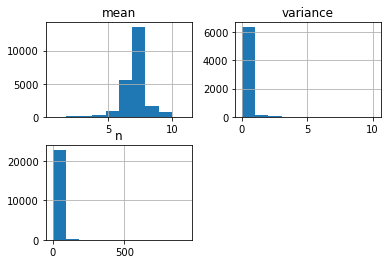

In [35]:
cluster_summary = pd.DataFrame({"mean": means, "variance": variances, "n": counts})
cluster_summary.hist()

array([[<AxesSubplot:title={'center':'mean'}>,
        <AxesSubplot:title={'center':'variance'}>],
       [<AxesSubplot:title={'center':'n'}>, <AxesSubplot:>]], dtype=object)

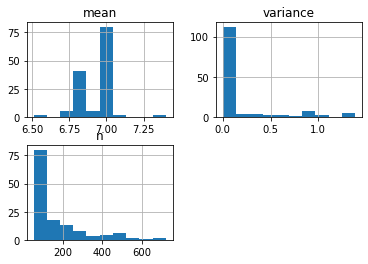

In [38]:
cluster_summary[(cluster_summary.n > 50) & (cluster_summary.variance > 0)].hist()

In [41]:
cluster_summary[(cluster_summary.n > 10) & (cluster_summary.variance > 0) & (cluster_summary["mean"] > 8)]

,mean,variance,n
12580,8.009091,0.880909,11
16896,8.146667,0.784095,15


In [42]:
cluster_summary[(cluster_summary.n > 10) & (cluster_summary.variance > 0) & (cluster_summary["mean"] < 6)]

,mean,variance,n
203,3.60,2.088161e-31,18
1646,2.65,4.378125e-02,11


In [43]:
all_clusters[203]

['Seq2187',
 'Seq2188',
 'Seq2189',
 'Seq2190',
 'Seq2197',
 'Seq2200',
 'Seq2208',
 'Seq2219',
 'Seq2227',
 'Seq2232',
 'Seq2238',
 'Seq2242',
 'Seq2262',
 'Seq2269',
 'Seq2305',
 'Seq2308',
 'Seq2315',
 'Seq2333']